# Linear Regression Model

1. closed-form equation that computes the best parameters that minimizes the cost function over the training set
2. Gradient Descent -> gradually puts the model towards the minimum cost function over the training set

In [37]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## Closed form -> Normal Equation

## Normal Equation for OLS

The Ordinary Least Squares (OLS) estimator minimizes the Mean Squared Error (MSE):

$$
J(\theta) = \frac{1}{2n} \| X\theta - y \|^2
$$

Setting the gradient to zero gives the **normal equation**:

$$
X^T X \, \theta = X^T y
$$

And the closed-form solution is:

$$
\hat{\theta} = (X^T X)^{-1} X^T y
$$

In [2]:
X = 2 * np.random.rand(100,1)       # features
y = 4+3*X + np.random.randn(100,1)  # Y = 4+3x + noise

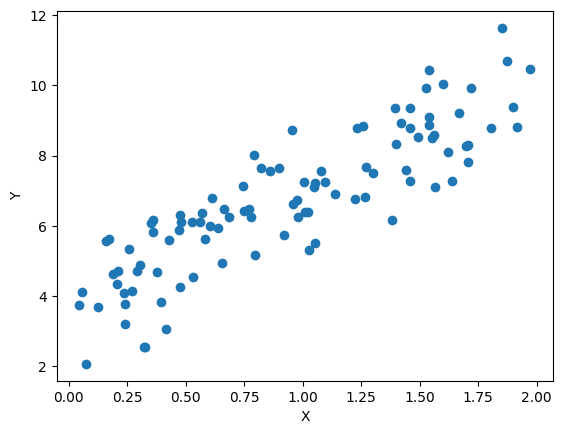

In [3]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [4]:
# inv to inverse
# dot to matrix multiplication

# In order to make the matrix of the features correctly, i must add one column of 1

X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv((X_b.T.dot(X_b))).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[3.74681565],
       [3.17987907]])

Finally i can make predictions

In [6]:
X_new=np.array([[0],[2]])           # see the value of y when x=0 and x=2
X_new_b=np.c_[np.ones((2,1)),X_new] #add a column of ones for 2 lines ,1 column


# the predict will he y = X*theta
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.74681565],
       [10.10657378]])

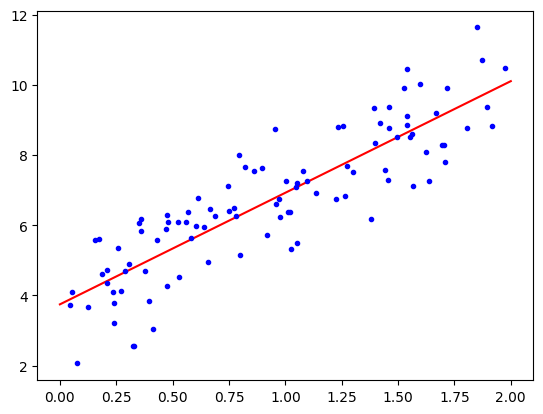

In [7]:
# plotting 

plt.plot(X_new,y_predict, 'r-') # red
plt.plot(X,y,'b.')              # blue
plt.show()

## Making the linear regression with scikit-learn

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)                 # i did not had to put a column of 1 in X
lin_reg.intercept_,lin_reg.coef_ # what are the  thetas of the feature

(array([3.74681565]), array([[3.17987907]]))

In [9]:
lin_reg.predict(X_new)

array([[ 3.74681565],
       [10.10657378]])

## The Normal Equation may not work if
1. There is a column redundant 
2. number of columns != number of rows
3. does not have an inverse (singular)

But the pseudoinverse is Always defined ! 

 The LinearRegression class is based on least squares based
 on spicy.linalg.lstsq() function


## Ordinary Least Squares with Pseudoinverse

The closed-form solution of OLS using the **Moore–Penrose pseudoinverse** is:

$$
\hat{\theta} = X^{+} y
$$

where \(X^{+}\) denotes the **pseudoinverse** of \(X\).

---

## Singular Value Decomposition (SVD)

Any matrix (X) can be decomposed as:

$$
X = U \, \Sigma \, V^T
$$

- \(U\) is an orthogonal matrix (\(n x n\))  
- \(\Sigma\) is a diagonal matrix with singular values (\(n x p\))  
- \(V\) is an orthogonal matrix (\(p x p\))  

The pseudoinverse is then given by:

$$
X^{+} = V \, \Sigma^{+} \, U^T
$$

where \(\Sigma^{+}\) is obtained by **taking the reciprocal of each non-zero singular value** in \(\Sigma\), and transposing the matrix.

---

## Why use the pseudoinverse?

- If \(X^T X\) is **not invertible** (e.g. collinear features, \(p > n\)), the normal equation  
  \((X^T X)^{-1} X^T y\) cannot be computed.  
- The pseudoinverse \(X^{+}\) always exists and provides a stable solution.  
- This is the foundation of the **least-squares solution** in linear algebra:

$$
\hat{\theta} = \underset{\theta}{\mathrm{argmin}} \; \| X\theta - y \|^2
$$

In [10]:
#calculating pseudo inverse

np.linalg.pinv(X_b).dot(y) # this will give theta hat already

array([[3.74681565],
       [3.17987907]])

### Complexity

X(T)X is (n+1)(n+1). Inverting it can have a complexity of O(N^3) while SVD is about O(N^2)

once i have my regression model, predictions are fast and the complexity is linear 

# Gradient Descent

Using iterations , minimize the cost function gradually going towards the biggest slope

-> Measure local gradient of error function regarding Theta and goes to the direction of descending gradient until reach the minimum (grad =0)

starting with random values and improve gradually until convergence

An important hyperparameter is the learning rate. If it is too small it takes a long time to converge but if it is too high i can jump the valley and diverge

The MSE is a convex function -> I can pick any point in the curve and the lines never cross the curve -> No local minima, only global minimum 

Using gradient descent i should make sure that ALL features have a similar scale ( using StandardScaler). The convex function makes like a bowl but if the scales are too different it will take a long time to converge ( bowl alonged etc)

# Batch Gradient Descent

Gradient descent -> Gradient of the cost function regarding the parameter Theta(j). How much my cost function will change if i change my parameter Theta(j) a little -> partial derivative

it uses the FULL training set X at each step . It is great when you have many different features but horrible for large training sets

Learning rate determines the size of the step it will be given

the gradient with respect to \(\theta\) is:

$$
\nabla_\theta J(\theta) = \frac{2}{n} X^T (X\theta - y)
$$

---

### Update Rule

At each iteration \(t\):

$$
\theta^{(t+1)} = \theta^{(t)} - \eta \, \nabla_\theta J(\theta^{(t)})
$$

where:
- \(\eta\) is the **learning rate** (step size).  
- \(n\) is the number of training samples.  

---

### Interpretation

- **Batch**: the gradient is computed using the **entire training set** \( (X, y) \) at each step.  
- Converges to the same solution as the normal equation:

$$
\hat{\theta} = (X^T X)^{-1} X^T y
$$

In [11]:
# quick implementation

eta = 0.1      # learning rate
n_interations = 1000
m = 100        # training samples


theta = np.random.randn(2,1)    # random init

for iteration in range(n_interations):
    gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta* gradient

In [12]:
theta

array([[3.74681565],
       [3.17987907]])

what if i use a different learning rate ? 
i want to see the first 10 steps of gradient descent using three different learning rates

In [13]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

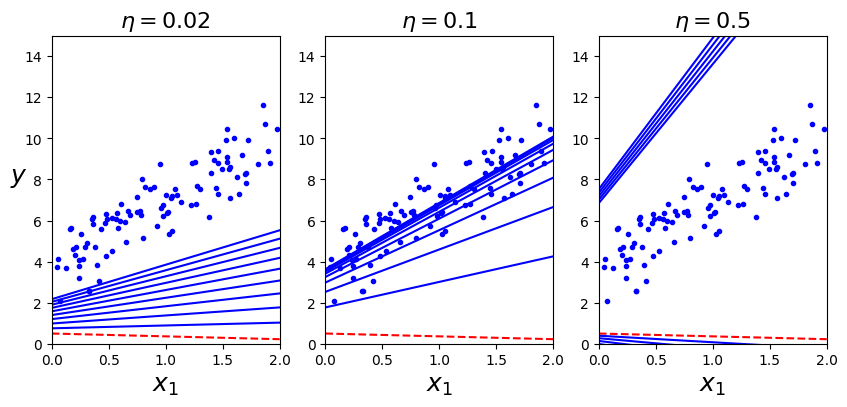

In [14]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

With the learning rate i can see that if it is 0.02 ,it is too slow . Getting to 0.1 seens apropriate and 0.5 diverges

# Stochastic Gradient Descent

since batch gradient descent uses all the trianing set to compute the gradient at every step ,it is very costy. Stochastic picks just a random instance of the training set at every step and computes the gradient based only on that single instance

due to its stochastic nature ,it is way less regular than batch gradient descent. the cost function flutuates and only decrease on average

so,  the final value is good, but not optimal. it is a way of getting to a solution with large datasets. it has a better chance of finding the global minimum, specially in irregular cost functions

the learning rate starts high to escape local minima and get smaller when gets closer to an optimal value (global minimum)

In [15]:
n_epochs = 50
t0,t1 = 5,50                  #learning parameters


def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)  # random init

for epoch in range(n_epochs): # 50 packages
    for i in range(m):        # rounds of m iterations
        random_index = np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi =y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) -yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients 
        # eta slows down with time , function as y=1/x

# we do everything with rounds of m iterations
# each round is an epoch

    

In [16]:
theta


array([[3.72776534],
       [3.13814176]])

The training instances must be independent and distributed equally, so all the parameters get pulled towards the global minimum

In [17]:
sgd_reg = SGDRegressor(max_iter = 1000, tol= 1e-3, penalty = None,eta0 = 0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [18]:
sgd_reg.intercept_ , sgd_reg.coef_

(array([3.74595024]), array([3.21938154]))

# Mini-batch Gradient Descent

at each step, instead of computing all the gradients based on the Full training set(batch GD) , or based on just one instance ( SGD) , minibatch GD computes the gradients of small random sets of instances, called mini batches

using GPUs the MGD gets better than SGD for performance boost. Mini batch gets closer to the minimum than SGD but it can be harder to escape

# Gradient Descent Methods

## Batch Gradient Descent
- Uses **all data** for each step.
- Very accurate, but **slow** with big datasets.
- Path is smooth.

## Stochastic Gradient Descent (SGD)
- Uses **one random data point** per step.
- Much faster, but **noisy/chaotic path**.
- Helps avoid local minima.

## Mini-Batch Gradient Descent
- Uses a **small random subset of data** per step.
- Balance between speed and stability.
- Most common in deep learning (works well on GPUs).

---

### Summary

| Method                  | Data per step     | Speed   | Path     |
|--------------------------|------------------|---------|----------|
| **Batch GD**             | All data         | Slow    | Smooth   |
| **SGD**                  | 1 sample         | Fast    | Chaotic  |
| **Mini-Batch GD**        | Subset of data   | Medium  | Balanced |

# Polynomial Regression

each feature will have a weight with power

In [19]:
# ex

m = 100
X = 6 * np.random.rand(m,1) - 3 # 100 lines
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

[]

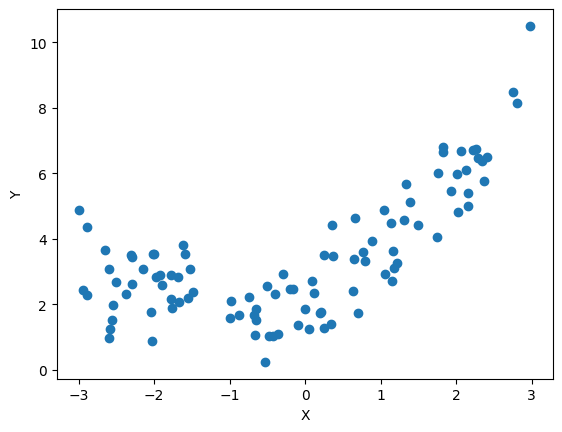

In [24]:
# Plotting

plt.scatter(X,y)
plt.ylabel('Y')
plt.xlabel("X")
plt.plot()

In [26]:
poly_features = PolynomialFeatures(degree = 2 , include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.15290063])

In [28]:
X_poly[0]

# it has the original feature X and the SQUARE of the feature -> vector (1 x Xˆ2 )

# fit a linear regression on this extended data

lin_reg = LinearRegression()

lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([2.28405711]), array([[0.88171323, 0.44446033]]))

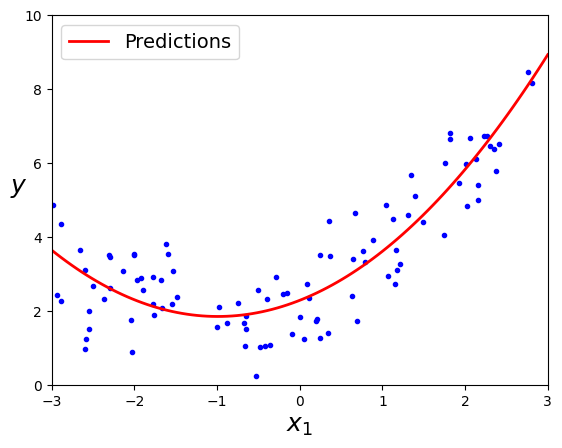

In [33]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)    # by the new linear regression
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

With multiple features ,polynomial reg can find relationship between features

but i must be careful with overfit because these new orders will try to follow the data

if the model perform well on training data but poorly with cross-validation -> Overfitting

# Learning Curves

How tell if a model is too simple or complex -> learning curves

shows the performance of the model on training and validation set -> function of training set size

In [35]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

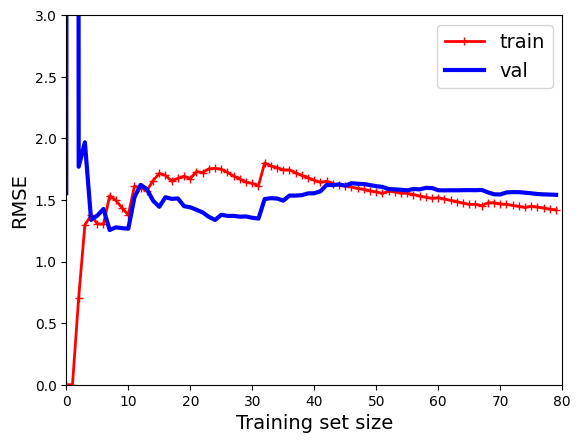

In [36]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
plt.show()                                      # not shown

with a small training set, the model has no errors, fits perfectly

but adding more data (training set size) , the data has noise so it cannot fit (it is not linear)

so the training error gets into a plateau 

with more examples , the validation error decreases and achieves another plateau -> this cannot be approached linearly

## underfiting -> adding more lines (data) is not as helpful as making the model more complex or have better features

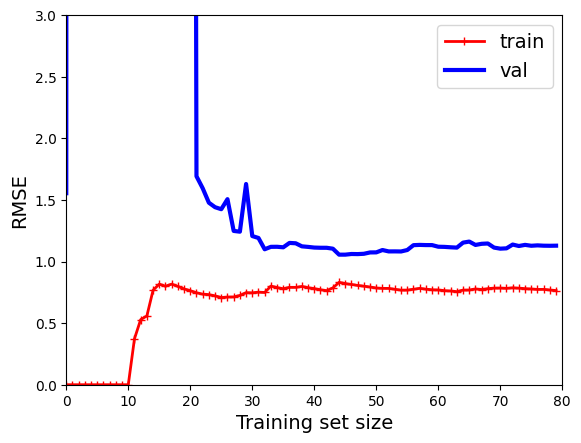

In [38]:
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show()                        # not shown

now with a polynome of degree 10 ,until size 10 the training set fits perfectly , so the error is much lower than when it was linear

Besides, the gap between the curves shows that the model perform better on training data than validation data -> Overfit 

## overfit -> Feed more training data until validation error reaches training error